In [178]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import randint as sp_randint

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn import metrics

%matplotlib inline

In [179]:
# importing data
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [180]:
# taking  look at basic data stats
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


#### Maximum varies from ~10 million to 41 million.

#### There is an incorrect value in year (2020)

In [181]:
data = data[data['Year']<2020]
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000
mean,8293.011148,2006.405611,0.265415,0.147563,0.078666,0.048327,0.540247
std,4792.781754,5.828189,0.821616,0.508780,0.311566,0.189891,1.565779
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


#### Lets take a look at data types.

In [182]:
# Most sold game
data.loc[data['Global_Sales'].idxmax()]

Rank                     1
Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16326 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16326 non-null int64
Name            16326 non-null object
Platform        16326 non-null object
Year            16326 non-null float64
Genre           16326 non-null object
Publisher       16290 non-null object
NA_Sales        16326 non-null float64
EU_Sales        16326 non-null float64
JP_Sales        16326 non-null float64
Other_Sales     16326 non-null float64
Global_Sales    16326 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.1+ MB


#### There is some missing data for year and publisher. Both features are irrelevant for my analysis.
#### Lets look at total sales for each market

Text(0.5, 0, 'Market')

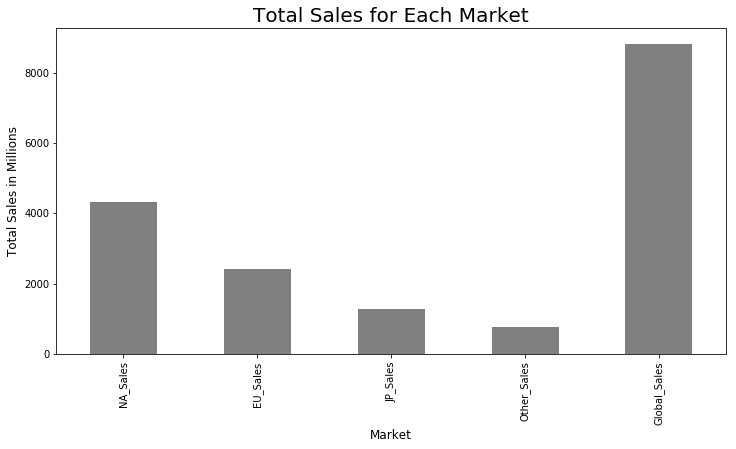

In [184]:
data[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().plot(kind='bar', figsize=(12,6), color='gray')

plt.title('Total Sales for Each Market', fontsize=20)
plt.ylabel('Total Sales in Millions', fontsize=12)
plt.xlabel('Market', fontsize=12)

#### North American market is about 2X the size of European and Japanese market and about 4X the size of other markets

# 1.What are some major differences between the North American, European, and Japanese video game markets?

Text(0.5, 0, 'Platform')

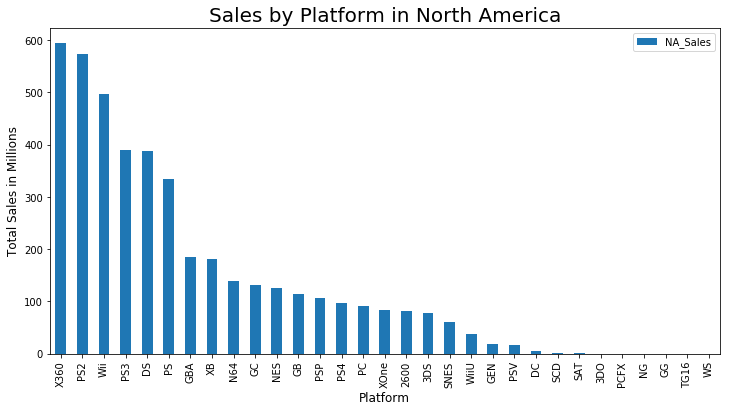

In [185]:
# NA market
platform_NA = data[['NA_Sales', 'Platform']].groupby('Platform').sum()
platform_NA.sort_values(['NA_Sales'], ascending=False).plot(kind='bar', figsize=(12,6))

plt.title('Sales by Platform in North America', fontsize=20)
plt.ylabel('Total Sales in Millions', fontsize=12)
plt.xlabel('Platform', fontsize=12)

Text(0.5, 0, 'Platform')

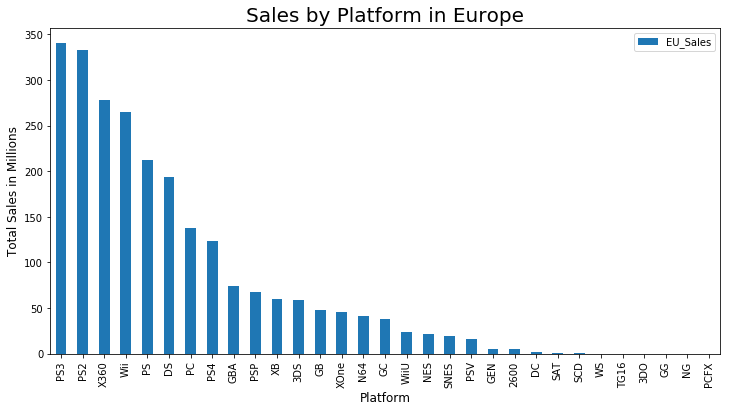

In [186]:
# EU Market
platform_EU = data[['EU_Sales', 'Platform']].groupby('Platform').sum()
platform_EU.sort_values(['EU_Sales'], ascending=False).plot(kind='bar', figsize=(12,6))

plt.title('Sales by Platform in Europe', fontsize=20)
plt.ylabel('Total Sales in Millions', fontsize=12)
plt.xlabel('Platform', fontsize=12)

Text(0.5, 0, 'Platform')

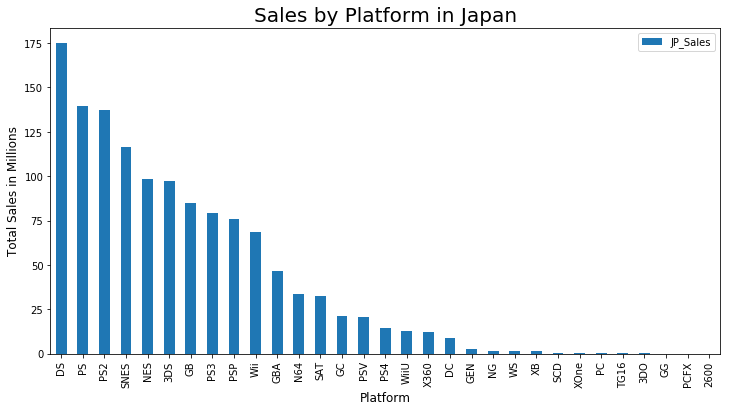

In [187]:
# JP market
platform_JP = data[['JP_Sales', 'Platform']].groupby('Platform').sum()
platform_JP.sort_values(['JP_Sales'], ascending=False).plot(kind='bar', figsize=(12,6))

plt.title('Sales by Platform in Japan', fontsize=20)
plt.ylabel('Total Sales in Millions', fontsize=12)
plt.xlabel('Platform', fontsize=12)

# 1.What are some major differences between the North American, European, and Japanese video game markets?
#### Platform: 

Xbox360 is the most successful platform in North America. Xbox 360 is followed by PS2, and Nintendo Wii.

In Europe, the most successful platform is PS3 followed by PS2 and Xbox 360.

In Japan the most successful platform is Nintendo DS, followed by PS1 and PS2.

#### Genre:

In Europe and North America, most dominant genres are Action, Sports, and Shooter (in that order). This is in contrast with the Japanese market where the dominant genre is Role playing games (RPG). In fact, RPG sales are more than 2X sales for action and sports games.

In North America RPG games sales are in 7th position.

I should also note that sales in the Japanese market are a smaller fraction of global sales as compared to North America and Europe.

# 2.What video game genres are trending in each market?

To find trending games I chose games after 2007. This is becuase in 2007 the first iPhone was release and I consider that as a time for shifting customer preferences.

In [188]:
data_2007 = data[data.Year>=2007]

Text(0.5, 0, 'Genre')

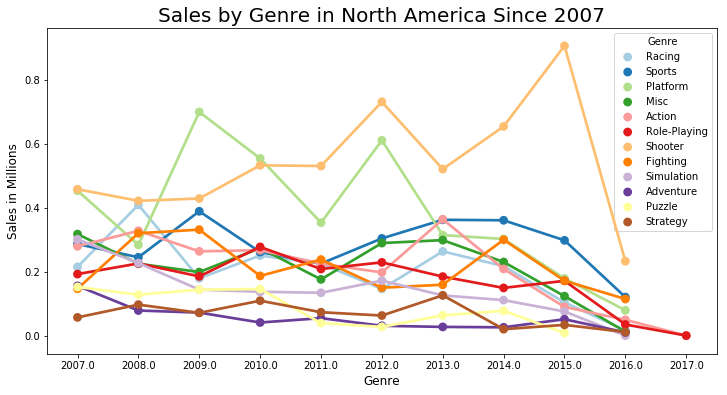

In [189]:
# NA market
plt.figure(figsize=(12,6))
sns.pointplot('Year', 'NA_Sales', hue='Genre', data=data_2007, ci=None,
             palette=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
                      '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928'])

plt.title('Sales by Genre in North America Since 2007', fontsize=20)
plt.ylabel('Sales in Millions', fontsize=12)
plt.xlabel('Genre', fontsize=12)

Text(0.5, 0, 'Genre')

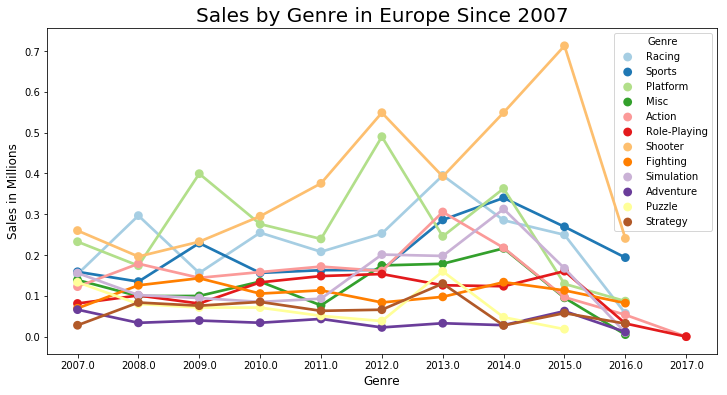

In [190]:
# EU market
plt.figure(figsize=(12,6))
sns.pointplot('Year', 'EU_Sales', hue='Genre', data=data_2007, ci=None,
             palette=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
                      '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928'])

plt.title('Sales by Genre in Europe Since 2007', fontsize=20)
plt.ylabel('Sales in Millions', fontsize=12)
plt.xlabel('Genre', fontsize=12)

Text(0.5, 0, 'Genre')

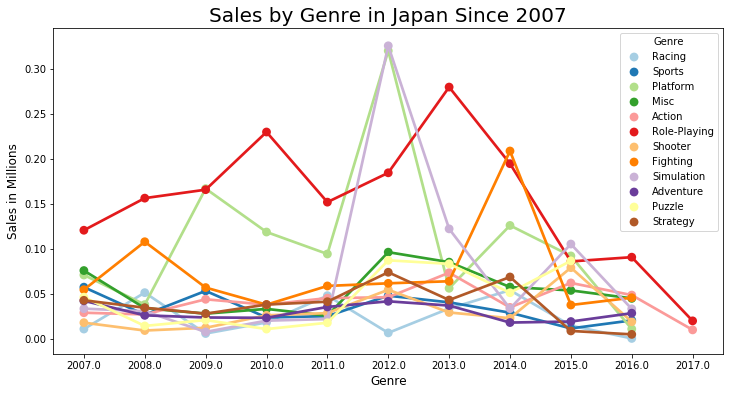

In [191]:
# JP market
plt.figure(figsize=(12,6))
sns.pointplot('Year', 'JP_Sales', hue='Genre', data=data_2007, ci=None,
             palette=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
                      '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928'])
plt.title('Sales by Genre in Japan Since 2007', fontsize=20)
plt.ylabel('Sales in Millions', fontsize=12)
plt.xlabel('Genre', fontsize=12)

Text(0.5, 0, 'Genre')

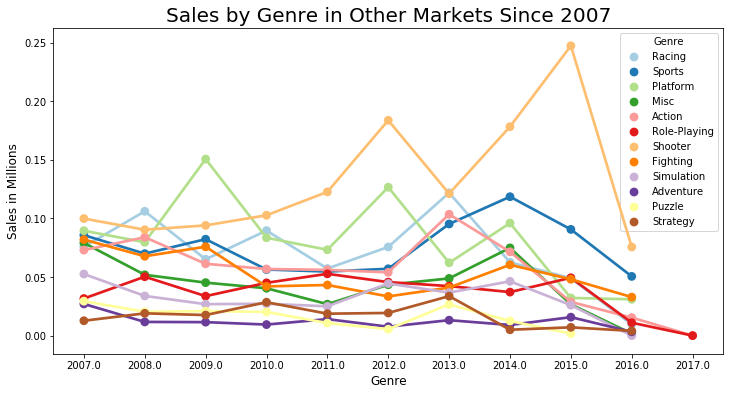

In [192]:
# Other market
plt.figure(figsize=(12,6))
sns.pointplot('Year', 'Other_Sales', hue='Genre', data=data_2007, ci=None,
             palette=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
                      '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928'])

plt.title('Sales by Genre in Other Markets Since 2007', fontsize=20)
plt.ylabel('Sales in Millions', fontsize=12)
plt.xlabel('Genre', fontsize=12)

# 2.What video game genres are trending in each market?

#### In Europe North America and Other markets shooting games are trending. Whereasthe popularity of other games is decreasing. A second best for trending is sports games.
#### In Japan the popularity of RPG games is decreasing. Fighting and simulation games may start trending in the near future.

# 3.What features about a video game are most indicative of its success?
#### For this question I would only focus in two features: Platform and Genre. Mostly because those are things companies can focus in order to change their impact on the market. I wont focus on Puclisher because companies can't change from lets say Sony to Nintendo.

In [201]:
X = data_2007[['Platform', 'Genre']]
y = data_2007['Global_Sales']
binarizer = OneHotEncoder()
X_binarized = binarizer.fit_transform(X)
X_binarized.shape

(9205, 28)

In [194]:
# splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_binarized, y, test_size=0.2, random_state=42)

# parameters to try fro Random Forest
forest_param_grid = [{'n_estimators':[10,100,1000], 'max_features':[2,8,16,20]}]
param_dist = {"n_estimators": [1000],
              "max_features": sp_randint(1, 28)}

# Use GridSearch to find the best parameters.
forest_regressor = RandomForestRegressor(n_estimators=1000)
# forest_grid_search = RandomizedSearchCV(estimator=forest_regressor, param_distributions=param_dist, cv=10, scoring='r2')
forest_regressor.fit(X_train, y_train)

# Do predictions using best estimator parameters
test_pred = forest_regressor.predict(X_test)

In [195]:
print(metrics.mean_squared_error(test_pred, y_test))

2.181023826155257


Performance of the model is not great.

In [196]:
binarizer.get_feature_names()

array(['x0_3DS', 'x0_DC', 'x0_DS', 'x0_GBA', 'x0_GC', 'x0_PC', 'x0_PS2',
       'x0_PS3', 'x0_PS4', 'x0_PSP', 'x0_PSV', 'x0_Wii', 'x0_WiiU',
       'x0_X360', 'x0_XB', 'x0_XOne', 'x1_Action', 'x1_Adventure',
       'x1_Fighting', 'x1_Misc', 'x1_Platform', 'x1_Puzzle', 'x1_Racing',
       'x1_Role-Playing', 'x1_Shooter', 'x1_Simulation', 'x1_Sports',
       'x1_Strategy'], dtype=object)

In [197]:
print(forest_regressor.feature_importances_)

[2.90073713e-02 9.33980550e-04 2.58076898e-02 1.44487617e-03
 2.06894660e-04 4.44807481e-02 1.06846747e-02 8.93461151e-02
 6.62261353e-02 1.40343680e-02 7.84939796e-03 8.95491618e-02
 1.67482706e-02 8.22669093e-02 4.78300574e-05 2.97710965e-02
 3.02966581e-02 6.61781461e-02 9.02642549e-03 2.81136515e-02
 5.73419858e-02 4.13841158e-03 3.50631747e-02 3.03728528e-02
 1.65072771e-01 9.18437777e-03 4.81470229e-02 8.65900277e-03]


Text(0.5, 0, 'Feature Code')

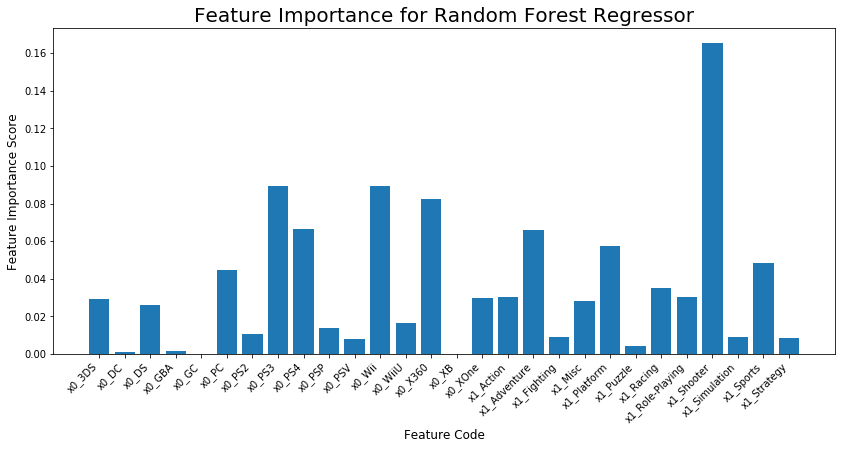

In [198]:
plt.figure(figsize=(14,6))
plt.bar(binarizer.get_feature_names(),forest_regressor.feature_importances_)
plt.xticks(rotation=45, ha='right')

plt.title('Feature Importance for Random Forest Regressor', fontsize=20)
plt.ylabel('Feature Importance Score', fontsize=12)
plt.xlabel('Feature Code', fontsize=12)

# 3.What features about a video game are most indicative of its success?
#### The features that better predict games success are:
#### If genre is shotting
#### If the Game is in PS3, X360, or Wii